<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/03%20-%20Pandas%20and%20Data%20Cleaning/Exercises/Solutions/exercise_02_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and data visualization

## EXERCISE 2

You have recently started your job in a famous telecom company. As you may very well know, telecoms fiercely fight for customer retention, with entire service branches devoted to this task. This is due to the fact that retention is more cost efficient than capturing new clients. One of your colleagues from the master got hired in the Marketing Department, and he needs to understand the company’s clients, so he’s asked you to help him out with a descriptive report and segmentation of the customer base. **He’s specially interested in the lifetime value of loyal customers.**

The purpose of this exercise is to prepare a descriptive report and segment the customers in the most adequate way. Use the data on `customers.csv`. Clean, organise and present an **exploratory analysis** of the data. What can you tell about the customers ?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some Pandas options
sns.set(style="darkgrid")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1. Preprocessing and Cleaning
    
As a first part we will go through the data, this way we will clean the csv:
- setup corrected types
- set index
- clean null values
- keep relevant data columns and raws

**TO DO:**
Load the "customers.csv" file in a pandas dataframe and display the head.

In [ ]:
#If you use google collab:
url ="https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/customers.csv"
customers = pd.read_csv(url)

#filename = "../../data/customers.csv"
#customers = pd.read_csv(filename)
display(customers.head())
display(customers.tail())


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


**TO DO:** Display the index, columns, dtypes and shape.

In [ ]:
display(customers.index)
display(customers.columns)
display(customers.dtypes)
display(customers.shape)

RangeIndex(start=0, stop=7043, step=1)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

(7043, 21)

* Modify data types, transform boolean values to correct one. Specially transform True/False values to catagories 0 and 1. The first step is to get the different values uniques present in each column. Then discretize to numerical values.

Firstly let's take a look to the tenure column. Since the tenure correspond to the Number of months the customer has stayed with the company, it is important to check null or 0 values.

**TO DO:** Firstly you will focus on the tenure columns acces with: `customers.tenure` or `customers['tenure']`. Check  and count the number of raws when `tenure == 0`. To test the values of a raw for a specific column value, you may used the ``.loc[]`` s.t: ``customers.loc[customers.tenure == 0]``

Finally to count the number of 0 values you apply the ``..count()``. This function will sum up the total of 0 values.

In [ ]:
customers.tenure.unique()
display(customers.loc[customers.tenure == 0].count())
display(customers.loc[customers.tenure == 0])

customerID          11
gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges        11
Churn               11
dtype: int64

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


**Note:** These 11 raws with be deleted later, this clearly correspond to outliers which maybe start a contract and cancelled befopre its application, or the data is simply missing. Note also that these raws with be dropped by the next steps (check empty string, nan values etc...)

The following piece of code allow you to identify uniques values for each columns. The 2 arguments represent the range of the number of uniques values you are looking for. This function return the interested columns that contains this number of unique values (it will be useful later to clean the columns).

In [ ]:
def identify_uniques(min_, max_):
    columns = list(customers.columns)
    print(columns, '\n')
    interested_columns = []
    for col in columns:
        #Retreive The uniques values of a column
        uniques = customers[col].unique().tolist()
        # Check if it belong to this range
        if len(uniques) >= min_ and len(uniques) < max_ :
            print(col, " uniques values: ", uniques)
            interested_columns.append(col)
    return interested_columns


Let's take a look for binary and mullticlass columns.

In [ ]:
print("Binary classes: ")
interested_columns = identify_uniques(0, 4)

print("Multi classes: ")
identify_uniques(3, 15)

Binary classes: 
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

gender  uniques values:  ['Female', 'Male']
SeniorCitizen  uniques values:  [0, 1]
Partner  uniques values:  ['Yes', 'No']
Dependents  uniques values:  ['No', 'Yes']
PhoneService  uniques values:  ['No', 'Yes']
MultipleLines  uniques values:  ['No phone service', 'No', 'Yes']
InternetService  uniques values:  ['DSL', 'Fiber optic', 'No']
OnlineSecurity  uniques values:  ['No', 'Yes', 'No internet service']
OnlineBackup  uniques values:  ['Yes', 'No', 'No internet service']
DeviceProtection  uniques values:  ['No', 'Yes', 'No internet service']
TechSupport  uniques values:  ['No', 'Yes', 'No internet service']
StreamingTV  uniques values:  ['No', 'Ye

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

**Note:** We notice that there is several columns that contains only two categories. Some of them contains also the "No internet service" and "No phone service" fields which can be convert to the "No" categorie directly. This will automatically convert the columns to the good pandas type. There is also some special columns with several but "countable" classes: *InternetService*, *Contract* and *PayemmentMethod*

**TO DO:** Replace the fields with corresponding values, this is an example:  
`customers.gender.replace(to_replace=['Female', 'Male'], value=[0, 1], inplace=True)`.
Make sure the fields have numerical types.
  1. For binary class (columns with 2 different values), replace ['No', 'Yes', 'No internet service', 'No phone service'] by =[0, 1, 0, 0]:  
 `.replace(to_replace=['No', 'Yes', 'No internet service', 'No phone service'], value=[0, 1, 0, 0]`
 use the ```interested_columns``` list.
  2. For multi class columns
    - replace the `gender` column s.t: `['Female', 'Male']` becomes `[0, 1]`
    - replace the `InternetService` column s.t: `['DSL', 'Fiber optic']` becomes `[2, 1]`
    - replace the `Contract` column s.t: `['Month-to-month', 'One year', 'Two year']` becomes `[0, 1, 2]`
    - replace the `PaymentMethod` column s.t: `['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']` becomes `[0, 1, 2, 3]`
  3. Transform the `TotalCharges` to numerical type with `pd.to_numeric()`, set the argument `errors='coerce` . This set to `Nan` for values that could not be convert to numerical value.



In [ ]:
# Avoid replacing No by 0
customers[interested_columns] = customers[interested_columns].replace(to_replace=['No', 'Yes', 'No internet service', 'No phone service'], value=[0, 1, 0, 0], inplace=False)

#Particular cases
customers.gender.replace(to_replace=['Female', 'Male'], value=[0, 1], inplace=True)
customers.InternetService.replace(to_replace=['DSL', 'Fiber optic'], value=[2, 1], inplace=True)
customers.Contract.replace(to_replace=['Month-to-month', 'One year', 'Two year'], value=[0, 1, 2], inplace=True)
customers.PaymentMethod.replace(to_replace=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], value=[0, 1, 2, 3], inplace=True)



In [ ]:
customers.TotalCharges = pd.to_numeric(customers.TotalCharges, errors='coerce')


**TO DO:** Execute the following code to display the different changes.

In [ ]:
print("All multi classes: ")
identify_uniques(0, 15)

All multi classes: 
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

gender  uniques values:  [0, 1]
SeniorCitizen  uniques values:  [0, 1]
Partner  uniques values:  [1, 0]
Dependents  uniques values:  [0, 1]
PhoneService  uniques values:  [0, 1]
MultipleLines  uniques values:  [0, 1]
InternetService  uniques values:  [2, 1, 0]
OnlineSecurity  uniques values:  [0, 1]
OnlineBackup  uniques values:  [1, 0]
DeviceProtection  uniques values:  [0, 1]
TechSupport  uniques values:  [0, 1]
StreamingTV  uniques values:  [0, 1]
StreamingMovies  uniques values:  [0, 1]
Contract  uniques values:  [0, 1, 2]
PaperlessBilling  uniques values:  [1, 0]
PaymentMethod  uniques values:  [0, 1, 2, 3]
Churn  uniques values:  [0, 1]


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

**To DO:**Let's check the modify dataframe, the head, the types and the new shape. Run the following code.

In [ ]:
display(customers.head())
display(customers.dtypes)
display(customers.shape)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

(7043, 21)

**TO DO:**Set index to the id by using `.set_index()``([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html)):

In [ ]:
``customers.set_index('customerID', inplace=True)

* Check other Nan values represention (space, tab, foo...), and convert them to Nan values:

**TO DO:** Run the following code. For each special empty, null characters, it returns the elements which satisfy the condition.

In [ ]:
sp_chars = ['foo', ' ', '\r\n\t', '', None]
for c in sp_chars:
    print("Test for ", c, ": ", np.where(customers.applymap(lambda x: x == c)))


Test for  foo :  (array([], dtype=int64), array([], dtype=int64))
Test for    :  (array([], dtype=int64), array([], dtype=int64))
Test for  
	 :  (array([], dtype=int64), array([], dtype=int64))
Test for   :  (array([], dtype=int64), array([], dtype=int64))
Test for  None :  (array([], dtype=int64), array([], dtype=int64))


**Note:** This values was correctly manage during the conversion process.

**TO DO:**
  1. Check if there are some null values. Use `.isnull().sum()`
  2. Remove these unwanted raws by using `.dropna(inplace=True)` on the dataframe.

In [ ]:
customers.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
customers.dropna(inplace=True)

**Note:** 11 nan raws with nan values have been removed.

### 2. Data visualization & Statistics
    
    
* Comparaison of the number of churned customers

**TO DO:** Now we will compare the number of churned customers. To do so, we will display a bar plot on `pd.value_counts(customers.churn)` (this function count for each unique value the total count). Then apply the `.plot()``function. Choose and modify correctly the parameters of your plot (set the title and the different axe labels)


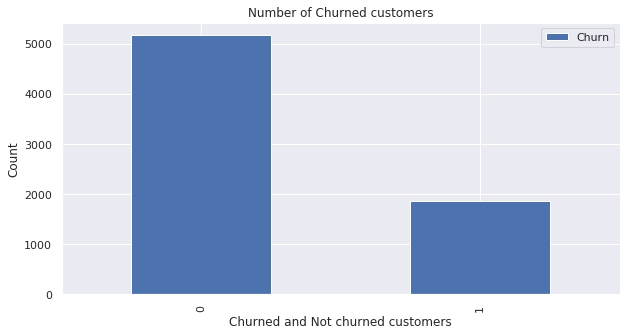

The number of churned customers is: 
 0    5163
1    1869
Name: Churn, dtype: int64


In [ ]:
pd.value_counts(customers.Churn).plot(kind='bar', legend=True, figsize=(10, 5), title="Number of Churned customers")
plt.xlabel('Churned and Not churned customers')
plt.ylabel("Count")
plt.show()
print("The number of churned customers is: \n", pd.value_counts(customers.Churn))

* Charges distribution & statistics

**TO DO:** We are now interesting of the continuous values columns s.t the tenure and the charges. Apply the `.describe()` function for these three fields. Plot the charts for TotalCharges, MonthlyCharges and tenure fields. Apply `.sort_salues(ascending = True)` before plotting.

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


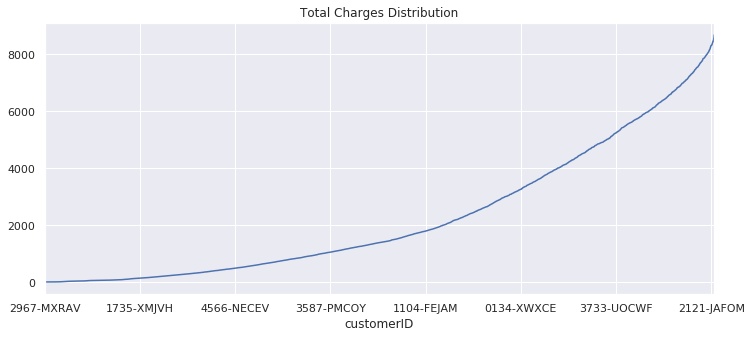

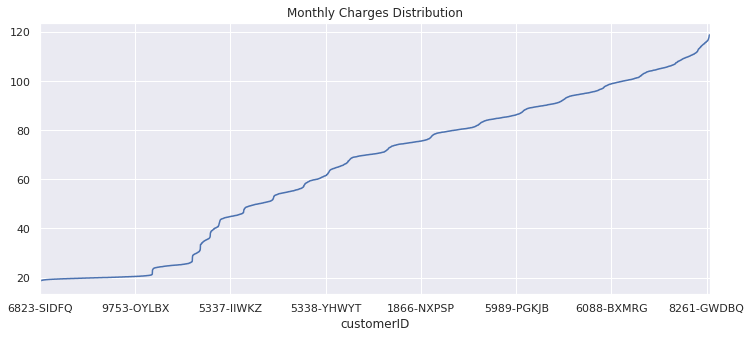

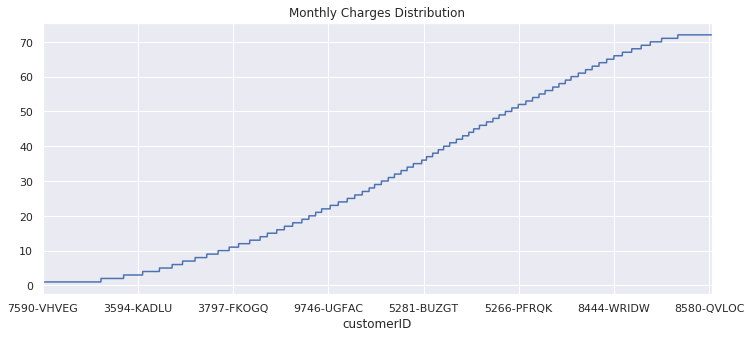

In [ ]:
display(customers[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())
customers.TotalCharges.sort_values(ascending = True).plot(title="Total Charges Distribution", figsize=(12, 5))
plt.show()
customers.MonthlyCharges.sort_values(ascending = True).plot(title="Monthly Charges Distribution", figsize=(12, 5))
plt.show()
customers.tenure.sort_values(ascending = True).plot(title="Monthly Charges Distribution", figsize=(12, 5))
plt.show()

### 3. Statistical analysis

To extract the differents features of our models, we have to analyse some statistical indicators such that: the correlation between veriable. Specially for the *Churn* columns since in the fututre it will be the target variable.

* Correlation between features columns

The Pearson correlation coefficient is the most widely used. It measures the strength of the linear relationship between normally distributed variables. When the variables are not normally distributed or the relationship between the variables is not linear, it may be more appropriate to use the Spearman rank correlation method.  

We will see that, the feature extraction methods depend if the inputs columns are linearly dependent or not.

**To do:**
  1. Compute the different correlations ('pearson' and 'spearman', plot correlation regarding the churn column s.t: `.corr(method='pearson')[['Churn]]`. We apply the correlation function other customers but at the end we keep only the Churn column as a dataframe. Keep in mind this important notation and selection.
  2. Plot the correlation values for Churn column in a bar plot. We can reuse the previous code but we ask you to sort by values the correlation to finally get a readable bar plot. You code will start like this:  
  `customers.corr(method='pearson')['Churn'][:-1].sort_values(ascending = True).` Note that the [:-1] avoid to take into account the self correlation of the Churn column.


In [ ]:
# Use double [] to display in a better way (df)
display(customers.corr(method='pearson')[['Churn']])
display(customers.corr(method='spearman')[['Churn']])

,Churn
gender,-0.008545
SeniorCitizen,0.150541
Partner,-0.149982
Dependents,-0.163128
tenure,-0.354049
PhoneService,0.011691
MultipleLines,0.040033
InternetService,0.047097
OnlineSecurity,-0.171270
OnlineBackup,-0.082307


,Churn
gender,-0.008545
SeniorCitizen,0.150541
Partner,-0.149982
Dependents,-0.163128
tenure,-0.369659
PhoneService,0.011691
MultipleLines,0.040033
InternetService,0.028472
OnlineSecurity,-0.171270
OnlineBackup,-0.082307


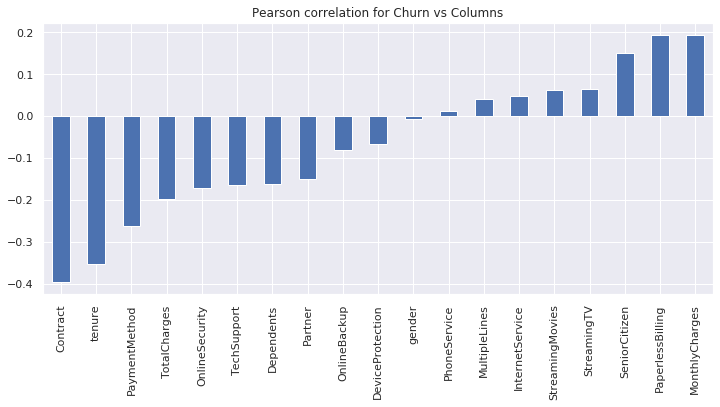

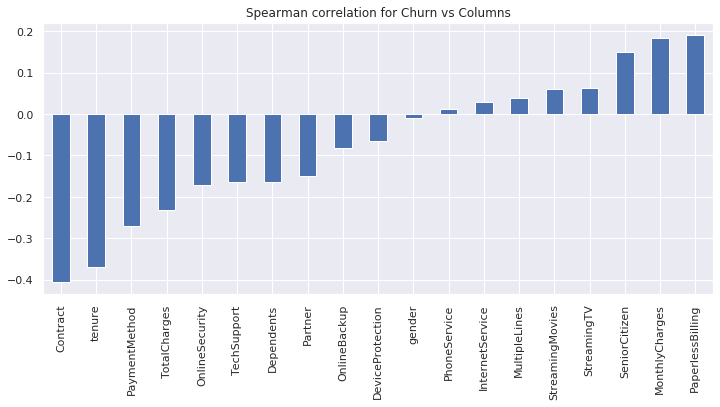

In [ ]:
customers.corr(method='pearson')['Churn'][:-1].sort_values(ascending = True).plot(kind='bar', title='Pearson correlation for Churn vs Columns', figsize=(12, 5))
plt.show()
customers.corr(method='spearman')['Churn'][:-1].sort_values(ascending = True).plot(kind='bar', title='Spearman correlation for Churn vs Columns', figsize=(12, 5))
plt.show()

**Note:** We are interested about the strongly correlated and uncorrelated columns. The main features that interfer the churning decision are: *Contract*, *tenure*, *PaymentMethod*, *TotalCharges*, *SeniorCitizen*, *MonthlyCharges* and *PaperlessBilling*. Note that the two most correlated features are inversed depending on the method.



**Note:**
These results seem very consistent with some hypothesis:  
- some types of services the customers signed for do not influence its decision to quit the contract
- the gender also is not relevant  
- the senior categorie is strongly correlated (i.e: we all dies  :sweat:)  
- contract, (payment method (linked with contract), charges and tenure are obviously important for a lots of people (there are strongly correlated between them)  
- the paperless billing columns is correlated to the MonthlyCharges

**TO DO:** Run the following code. It plots the correlation matrix using `sns.heatmap()`.

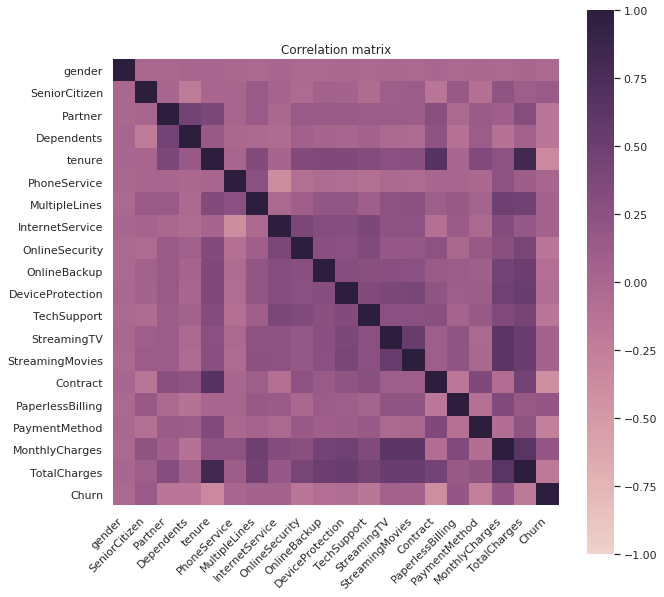

In [ ]:
corr = customers.corr()

plt.figure(figsize=(10,10))
plt.title("Correlation matrix")
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.cubehelix_palette(200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
